# Traffic Accident Statistical Analysis

We are going to load all traffic accident data from 2018 to 2023. After that, we are going to do 10 - 15 statistical analysis with various data-mining techiques. 

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score,
    mean_squared_log_error,
    median_absolute_error
)
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV


file_path = 'Data/US_Accidents_March23_sampled_500k.csv'
data = pd.read_csv(file_path)

print(data)

               ID   Source  Severity                     Start_Time  \
0       A-2047758  Source2         2            2019-06-12 10:10:56   
1       A-4694324  Source1         2  2022-12-03 23:37:14.000000000   
2       A-5006183  Source1         2  2022-08-20 13:13:00.000000000   
3       A-4237356  Source1         2            2022-02-21 17:43:04   
4       A-6690583  Source1         2            2020-12-04 01:46:00   
...           ...      ...       ...                            ...   
499995  A-6077227  Source1         2            2021-12-15 07:30:00   
499996  A-6323243  Source1         2            2021-12-19 16:25:00   
499997  A-3789256  Source1         2            2022-04-13 19:28:29   
499998  A-7030381  Source1         3            2020-05-15 17:20:56   
499999  A-5438901  Source1         2            2022-04-02 23:23:13   

                             End_Time  Start_Lat   Start_Lng    End_Lat  \
0                 2019-06-12 10:55:58  30.641211  -91.153481        NaN 

Now it's time to do some statistical analysis.

## 1. The state with most number of accidents

In [13]:
state_accident_counts = data['State'].value_counts()
most_accidents_state = state_accident_counts.idxmax()
most_accidents_count = state_accident_counts.max()

most_accidents_state, most_accidents_count / sum(state_accident_counts)

('CA', 0.226548)

California is the state that has the highest number of accidents in the U.S., accounting for 22.65% of all incidents from 2017 to 2023.

## 2. The city with most number of accidents

In [18]:
city_accident_counts = data['City'].value_counts()
most_accidents_city = city_accident_counts.idxmax()
most_accidents_count = city_accident_counts.max()

most_accidents_city, most_accidents_count / sum(city_accident_counts)

('Miami', 0.02428292275106454)

Miami is the city that has the highest number of accidents in the U.S., accounting for 2.43% of all traffic incidents from 2017 to 2023.

## 3. Time of the day with most accidents

In [38]:
hourly_accidents = data.groupby(data['Start_Time'].dt.hour).size()

hourly_accidents_rolling_sum = hourly_accidents.rolling(window=2).sum()
max_accidents_range_start_hour = hourly_accidents_rolling_sum.idxmax()
max_accidents_range_end_hour = (max_accidents_range_start_hour + 1) % 24

max_accidents_range_start_hour, max_accidents_range_end_hour

(8.0, 9.0)

8 a.m. to 9 a.m is the time of the day with most accidents, which is also the time of morning office-going hours.

## 4. Day in the week with most accidents

In [48]:
data['DayOfWeek'] = data['Start_Time'].dt.dayofweek

day_of_week_accident_counts = data['DayOfWeek'].value_counts()
most_accidents_day = int(day_of_week_accident_counts.idxmax())

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
most_accidents_day_name = days[most_accidents_day]

most_accidents_day_name

'Friday'

Friday is the day in the week with most accidents.

## 5. Month in the year with most accidents

In [50]:
data['Month'] = data['Start_Time'].dt.month

month_accident_counts = data['Month'].value_counts()
most_accidents_month = int(month_accident_counts.idxmax())

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
most_accidents_month_name = months[most_accidents_month - 1] 

most_accidents_month_name


'December'

December is the month with most accidents in a year. This could possbly be related to the harsh weather during the time.

## 6. Distribution of accidents severity

In [52]:
severity_counts = data['Severity'].value_counts(normalize=True).sort_index() * 100

severity_counts

Severity
1     0.8548
2    79.6284
3    16.9040
4     2.6128
Name: proportion, dtype: float64

Severity 1 accidents consist of 0.85% of all accidents, severity 2 accidents consist of 79.6% of all accidents, severity 3 accidents consist of 16.9% of all accidents, and severity 4 accidents consist of 2.6% of all accients.

## 7. Places with the highest chance of accidents

In [57]:
place_counts = data.loc[:, ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Station', 'Stop', 'Roundabout', 'Traffic_Signal']].sum()
most_frequent_place = place_counts.idxmax()
most_frequent_place_count = place_counts.max()

most_frequent_place, most_frequent_place_count / 500000

('Traffic_Signal', 0.14807)

Traffic_signal is the place with the highest chance of traffic accidents, accounting for 14.8% of all accidents.

## 8. 0.1%, 1%, and 10% of most dangerous streets make what percentage of the whole accidents


In [58]:
street_accident_counts = data['Street'].value_counts().sort_values(ascending=False)

total_accidents = street_accident_counts.sum()
num_streets = len(street_accident_counts)

top_01_percent_streets = max(1, int(num_streets * 0.001))
top_1_percent_streets = max(1, int(num_streets * 0.01))
top_10_percent_streets = max(1, int(num_streets * 0.1))

percent_accidents_top_01_percent = street_accident_counts.head(top_01_percent_streets).sum() / total_accidents * 100
percent_accidents_top_1_percent = street_accident_counts.head(top_1_percent_streets).sum() / total_accidents * 100
percent_accidents_top_10_percent = street_accident_counts.head(top_10_percent_streets).sum() / total_accidents * 100

percent_accidents_top_01_percent, percent_accidents_top_1_percent, percent_accidents_top_10_percent

(20.349723317624957, 42.910502314198226, 71.38365220735055)

0.1%, 1%, and 10% of the most dangerous streets in the U.S. make 20.35%, 42.91%, and 71.38% of all traffic accidents respectively.

## 9. Is there a relationship between severity of accident and humidity

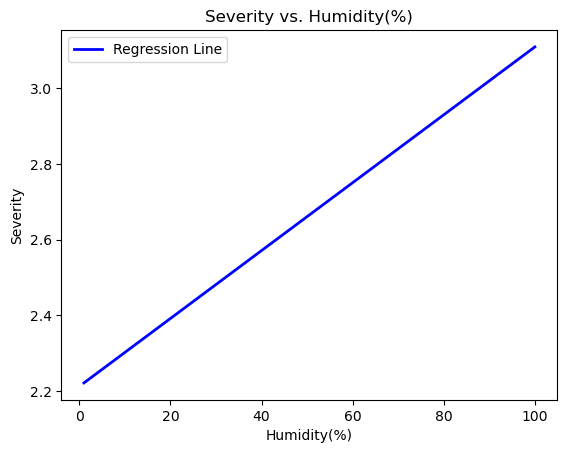

In [24]:
df = pd.DataFrame(data)

humidity_imputer = SimpleImputer(strategy='median')
df['Humidity(%)'] = humidity_imputer.fit_transform(df[['Humidity(%)']].values)

df.dropna(subset=['Severity'], inplace=True)

X = df[['Humidity(%)']]  
y = df['Severity']    

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")

humidity_values = np.linspace(X['Humidity(%)'].min(), X['Humidity(%)'].max(), num=500).reshape(-1, 1)

predicted_severity = linear_reg.predict(humidity_values)

plt.plot(humidity_values, predicted_severity, color='blue', linewidth=2, label='Regression Line')
plt.xlabel('Humidity(%)')
plt.ylabel('Severity')
plt.title('Severity vs. Humidity(%)')
plt.legend()

plt.show()

## 10. Is there a relationship between severity of accident and visibility range

/Users/shiyaoli/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


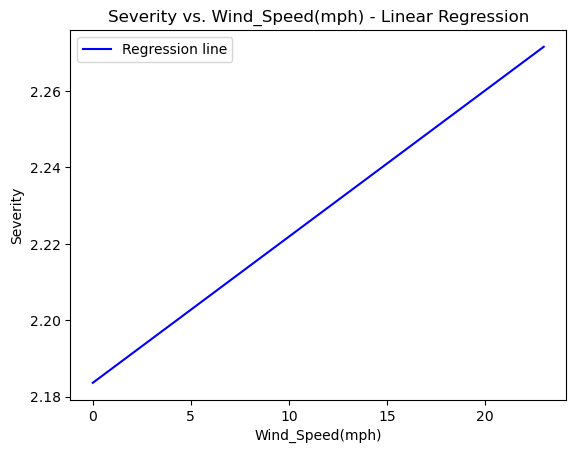

In [39]:
visibility_imputer = SimpleImputer(strategy='median')
df['Wind_Speed(mph)'] = visibility_imputer.fit_transform(df[['Wind_Speed(mph)']].values)

df.dropna(subset=['Severity'], inplace=True)

X = df[['Wind_Speed(mph)']]  # Features
y = df['Severity']  # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


X_full_range_scaled = scaler.transform(np.linspace(X['Wind_Speed(mph)'].min(), X['Wind_Speed(mph)'].max(), num=500).reshape(-1, 1))
y_full_range_pred = model.predict(X_full_range_scaled)
X_full_range = scaler.inverse_transform(X_full_range_scaled)

plt.plot(X_full_range, y_full_range_pred, color='blue', label='Regression line')

plt.xlabel('Wind_Speed(mph)')
plt.ylabel('Severity')
plt.title('Severity vs. Wind_Speed(mph) - Linear Regression')
plt.legend()

plt.show()

## Accident Duration Prediction

In [18]:
df_TX = data.loc[:,["ID",'Start_Lat','Start_Lng',"State",'Start_Time','End_Time','Distance(mi)',
        'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
        'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
        'Astronomical_Twilight',"Severity"]]

print(df_TX.head(1))
# Replace '.000000000' with an empty string in the 'Start_Time' column
df_TX['Start_Time'] = df_TX['Start_Time'].str.replace(r'\.\d+', '', regex=True)
# Replace '.000000000' with an empty string in the 'End_Time' column
df_TX['End_Time'] = df_TX['End_Time'].str.replace(r'\.\d+', '', regex=True)

df_TX['Start_Time'] = pd.to_datetime(df_TX['Start_Time'], format='%Y-%m-%d %H:%M:%S')
df_TX['End_Time'] = pd.to_datetime(df_TX['End_Time'], format='%Y-%m-%d %H:%M:%S')

# subtract columns to get time difference
df_TX['time_diff'] = (df_TX['End_Time'] - df_TX['Start_Time']).dt.total_seconds() / 60
df_TX['time_binary'] = df_TX['time_diff'].apply(lambda x: 1 if x > 156 else 0)

print(df_TX['time_diff'])

          ID  Start_Lat  Start_Lng State           Start_Time  \
0  A-2047758  30.641211 -91.153481    LA  2019-06-12 10:10:56   

              End_Time  Distance(mi)  Temperature(F)  Wind_Chill(F)  \
0  2019-06-12 10:55:58           0.0            77.0           77.0   

   Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  Wind_Speed(mph)  \
0         62.0         29.92            10.0             NW              5.0   

   ...  Give_Way Junction  No_Exit  Railway  Roundabout  Station   Stop  \
0  ...     False    False    False    False       False    False  False   

   Traffic_Calming  Traffic_Signal  Sunrise_Sunset  Civil_Twilight  \
0            False            True             Day             Day   

   Nautical_Twilight  Astronomical_Twilight  Severity  
0                Day                    Day         2  

[1 rows x 33 columns]
0          45.033333
1         139.650000
2         129.750000
3         120.316667
4         147.150000
             ...    
499995     2

In [9]:
# calculate the lower and upper bounds for the middle 95% range
lower_bound = df_TX['time_diff'].quantile(0.05)
upper_bound = df_TX['time_diff'].quantile(0.95)

# select all rows in the dataframe where time_diff is within the middle 90% range
df_TX_filtered = df_TX[(df_TX['time_diff'] >= lower_bound) & (df_TX['time_diff'] <= upper_bound)]

In [10]:
print('Before removing outliers')
print(np.max(df_TX['time_diff']))
print(np.min(df_TX['time_diff']))
print(np.average(df_TX['time_diff']))
print(np.std(df_TX['time_diff']))
print('After removing outliers')
print(np.max(df_TX_filtered['time_diff']))
print(np.min(df_TX_filtered['time_diff']))
print(np.average(df_TX_filtered['time_diff']))
print(np.std(df_TX_filtered['time_diff']))

Before removing outliers
2236405.75
2.5
421.94652689999987
13206.41576583684
After removing outliers
360.0
28.733333333333334
97.6909243648068
83.80166502752309


Text(0, 0.5, 'Accident duration (in minutes)')

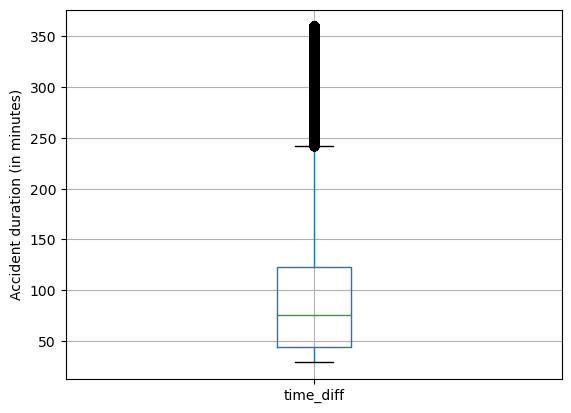

In [11]:
# plot density plot of the column data
df_TX_filtered.boxplot(column='time_diff')
plt.ylabel('Accident duration (in minutes)')

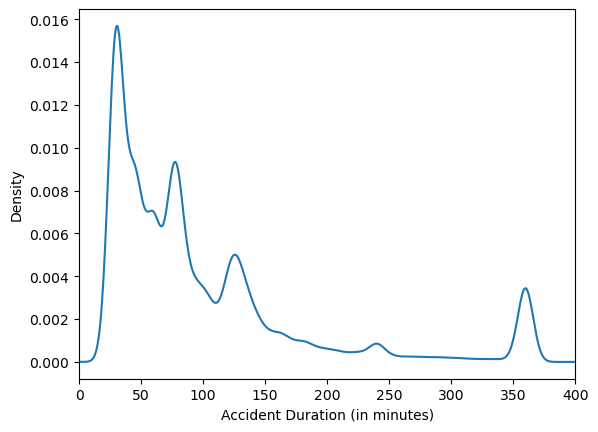

In [12]:
# plot density plot of the column data
df_TX_filtered['time_diff'].plot(kind='density')
plt.xlabel('Accident Duration (in minutes)')
plt.xlim(0,400)
plt.show()

In [32]:
df_TX['Temperature(F)'] = df_TX['Temperature(F)'].fillna(np.mean(df_TX['Temperature(F)']))
df_TX['Wind_Chill(F)'] = df_TX['Wind_Chill(F)'].fillna(np.mean(df_TX['Wind_Chill(F)']))
df_TX['Humidity(%)'] = df_TX['Humidity(%)'].fillna(np.mean(df_TX['Humidity(%)']))
df_TX['Pressure(in)'] = df_TX['Pressure(in)'].fillna(np.mean(df_TX['Pressure(in)']))
df_TX['Pressure(in)'] = df_TX['Visibility(mi)'].fillna(np.mean(df_TX['Visibility(mi)']))
df_TX['Wind_Direction'] = df_TX['Wind_Direction'].fillna(df_TX['Wind_Direction'].mode()[0])
df_TX['Wind_Speed(mph)'] = df_TX['Wind_Speed(mph)'].fillna(np.mean(df_TX['Wind_Speed(mph)']))
df_TX['Precipitation(in)'] = df_TX['Precipitation(in)'].fillna(np.mean(df_TX['Precipitation(in)']))
df_TX['Sunrise_Sunset'] = df_TX['Sunrise_Sunset'].fillna(df_TX['Sunrise_Sunset'].mode()[0])
df_TX['Weather_Condition'] = df_TX['Weather_Condition'].fillna(df_TX['Weather_Condition'].mode()[0])
df_TX['Civil_Twilight'] = df_TX['Civil_Twilight'].fillna(df_TX['Civil_Twilight'].mode()[0])
df_TX['Nautical_Twilight'] = df_TX['Nautical_Twilight'].fillna(df_TX['Nautical_Twilight'].mode()[0])
df_TX['Astronomical_Twilight'] = df_TX['Astronomical_Twilight'].fillna(df_TX['Astronomical_Twilight'].mode()[0])
df_TX['Visibility(mi)'] = df_TX['Visibility(mi)'].fillna(np.mean(df_TX['Visibility(mi)']))

In [33]:
df_TX[['Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']] = df_TX[['Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']] *1

In [34]:
df_TX['Weather_Condition'] = pd.factorize(df_TX['Weather_Condition'])[0]
df_TX['Sunrise_Sunset'] = pd.factorize(df_TX['Sunrise_Sunset'])[0]
df_TX['Civil_Twilight'] = pd.factorize(df_TX['Civil_Twilight'])[0]
df_TX['Astronomical_Twilight'] = pd.factorize(df_TX['Astronomical_Twilight'])[0]
df_TX['Nautical_Twilight'] = pd.factorize(df_TX['Nautical_Twilight'])[0]
df_TX['Wind_Direction'] = pd.factorize(df_TX['Wind_Direction'])[0]

In [35]:
pd.set_option('display.max_columns', 29)

print(df_TX.head(n=1))

   Start_Lat  Start_Lng          Start_Time  Distance(mi)  Temperature(F)  \
0  30.641211 -91.153481 2019-06-12 10:10:56           0.0            77.0   

   Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Direction  \
0           77.0         62.0          10.0            10.0               0   

   Wind_Speed(mph)  Precipitation(in)  Weather_Condition  Amenity  ...  \
0              5.0                0.0                  0        0  ...   

   No_Exit  Railway  Roundabout  Station  Stop  Traffic_Calming  \
0        0        0           0        0     0                0   

   Traffic_Signal  Sunrise_Sunset  Civil_Twilight  Nautical_Twilight  \
0               1               0               0                  0   

   Astronomical_Twilight  Severity  time_diff  time_binary  
0                      0         2  45.033333            0  

[1 rows x 32 columns]


In [44]:
df_TX = df_TX.drop(['Start_Time'],axis=1)
df_TX_input = df_TX.drop(['Distance(mi)','Severity'],axis=1)

In [45]:
df_TX['time_diff']

0          45.033333
1         139.650000
2         129.750000
3         120.316667
4         147.150000
             ...    
499995     20.500000
499996     75.616667
499997    125.250000
499998     30.000000
499999     86.583333
Name: time_diff, Length: 500000, dtype: float64

In [46]:
lower_bound = df_TX['time_diff'].quantile(0.05)
upper_bound = df_TX['time_diff'].quantile(0.95)

# select all rows in the dataframe where time_diff is within the middle 90% range
df_TX_filtered = df_TX[(df_TX['time_diff'] >= lower_bound) & (df_TX['time_diff'] <= upper_bound)]
df_TX_filtered

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity,time_diff,time_binary
0,30.641211,-91.153481,0.000,77.0,77.0,62.0,10.0,10.0,0,5.0,0.00,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,2,45.033333,0
1,38.990562,-77.399070,0.056,45.0,43.0,48.0,10.0,10.0,1,5.0,0.00,0,0,0,...,0,0,0,0,0,0,0,1,1,1,1,2,139.650000,0
2,34.661189,-120.492822,0.022,68.0,68.0,73.0,10.0,10.0,1,13.0,0.00,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,2,129.750000,0
3,43.680592,-92.993317,1.054,27.0,15.0,86.0,10.0,10.0,2,15.0,0.00,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,120.316667,0
4,35.395484,-118.985176,0.046,42.0,42.0,34.0,10.0,10.0,3,0.0,0.00,0,0,0,...,0,0,0,0,0,0,0,1,1,1,1,2,147.150000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,34.136442,-117.411771,0.000,90.0,90.0,7.0,10.0,10.0,0,8.0,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,92.733333,0
499996,26.702570,-80.111169,0.040,78.0,78.0,87.0,10.0,10.0,22,13.0,0.01,5,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,75.616667,0
499997,34.561862,-112.259620,0.549,52.0,52.0,12.0,10.0,10.0,8,12.0,0.00,0,0,0,...,0,0,0,0,0,0,1,1,1,0,0,2,125.250000,0
499998,38.406680,-78.619310,0.000,82.0,82.0,38.0,10.0,10.0,16,14.0,0.00,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,3,30.000000,0


In [109]:
# Define features and target
X = df_TX_filtered.drop(columns=['time_diff', 'time_binary', 'Start_Lng', 'Start_Lat'])  # dropping non-numeric or non-relevant features
y = df_TX_filtered['time_diff']

X = X[:50000]
y = y[:50000]
df_TX_filtered = df_TX_filtered[:50000]

# print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

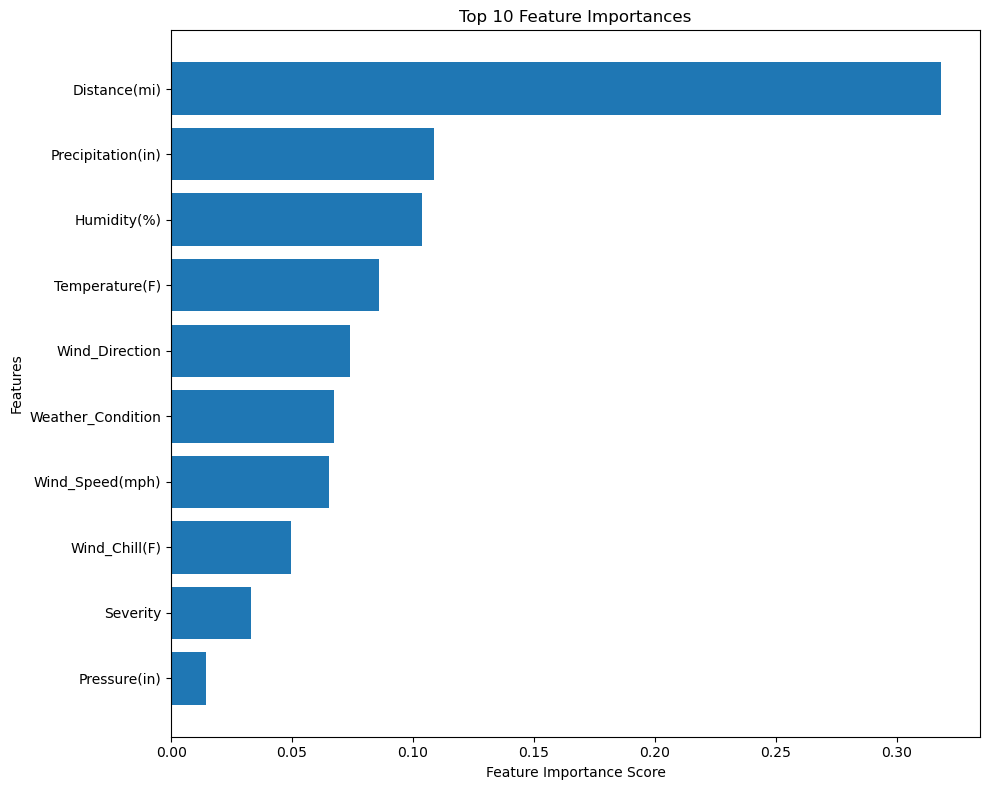

In [111]:
# Get top 10 feature importances and corresponding names
top_n = 10
top_indices = indices[:top_n]
top_importances = importances[top_indices]
top_features = X_train.columns[top_indices]

# Create the plot
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.title('Top 10 Feature Importances')
plt.barh(range(top_n), top_importances, align='center')
plt.yticks(range(top_n), top_features)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()

In [112]:
# df_TX_filtered = df_TX_filtered[:50000]
# print(df_TX_filtered)
# Define features and target
top_features = ['Distance(mi)', 'Precipitation(in)', 'Humidity(%)', 'Temperature(F)', 'Weather_Condition', 'Wind_Direction', 'Wind_Speed(mph)', 'Wind_Chill(F)', 'Severity', 'Pressure(in)']
X = df_TX_filtered[top_features]
y = abs(df_TX_filtered['time_diff'])  # replace with the actual target column name

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare a dictionary of regression models including the new ones
models = {
    'RandomForest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'LinearRegression': LinearRegression(),
    'XGBoost': XGBRegressor(),
    'SVR': SVR(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

# Prepare a dictionary for model results
model_results = {}

# Train and evaluate each regression model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate regression metrics
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    evs = explained_variance_score(y_test, y_pred_test)  # New metric
#     msle = mean_squared_log_error(y_test, y_pred_test)   # New metric
    
    # Store results
    model_results[model_name] = {
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'MAE': mae,
        'R2_Score': r2,
        'Explained_Variance_Score': evs
#         'Mean_Squared_Log_Error': msle
    }

# Display the results
for model_name, metrics in model_results.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value}")

RandomForest:
  Train_RMSE: 26.931695648597735
  Test_RMSE: 69.09524534054532
  MAE: 47.266956229592594
  R2_Score: 0.41415501484927797
  Explained_Variance_Score: 0.4145103186835877
AdaBoost:
  Train_RMSE: 73.21251862577897
  Test_RMSE: 74.38948415778461
  MAE: 58.62306801154016
  R2_Score: 0.3209379119194775
  Explained_Variance_Score: 0.3664903029754669
DecisionTree:
  Train_RMSE: 2.275574503045386
  Test_RMSE: 94.00530319483838
  MAE: 57.98643076923077
  R2_Score: -0.08440397080643125
  Explained_Variance_Score: -0.07648994821509492
LinearRegression:
  Train_RMSE: 83.21291659166316
  Test_RMSE: 89.21929682076508
  MAE: 62.11666516207555
  R2_Score: 0.023203753046409203
  Explained_Variance_Score: 0.024421642159442203
XGBoost:
  Train_RMSE: 28.800687183753165
  Test_RMSE: 71.8946767241168
  MAE: 48.33208087670008
  R2_Score: 0.3657216895296578
  Explained_Variance_Score: 0.3659238578098901
SVR:
  Train_RMSE: 89.24303842686541
  Test_RMSE: 95.85798730241235
  MAE: 57.555505418660864


In [113]:
# Convert the model results to a DataFrame
results_df = pd.DataFrame(model_results).T
results_df

,Train_RMSE,Test_RMSE,MAE,R2_Score,Explained_Variance_Score
RandomForest,26.931696,69.095245,47.266956,0.414155,0.414510
AdaBoost,73.212519,74.389484,58.623068,0.320938,0.366490
DecisionTree,2.275575,94.005303,57.986431,-0.084404,-0.076490
LinearRegression,83.212917,89.219297,62.116665,0.023204,0.024422
XGBoost,28.800687,71.894677,48.332081,0.365722,0.365924
SVR,89.243038,95.857987,57.555505,-0.127569,-0.006591
Lasso,83.230207,89.139919,62.084168,0.024941,0.026210
Ridge,83.213052,89.214100,62.111425,0.023318,0.024535


In [116]:
# Use the same data splitting as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare a dictionary for model results
model_results = {}

# Instead of defining a dictionary of models, we'll define a list of model names for iteration
model_names = ['RandomForest', 'AdaBoost', 'DecisionTree', 'LinearRegression', 'XGBoost', 'SVR', 'Lasso', 'Ridge']

# Define a function to perform grid search
def grid_search(model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Iterate over each model, performing grid search and evaluation
for model_name in model_names:
    if model_name == 'RandomForest':
        param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
        model = grid_search(RandomForestRegressor(), param_grid)
    elif model_name == 'AdaBoost':
        param_grid = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}
        model = grid_search(AdaBoostRegressor(), param_grid)
    elif model_name == 'DecisionTree':
        param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
        model = grid_search(DecisionTreeRegressor(), param_grid)
    # Add more grid searches for different models here
    # ...
    else:
        # Instantiate models directly without eval
        if model_name == 'LinearRegression':
            model = LinearRegression()
        elif model_name == 'XGBoost':
            model = XGBRegressor()
        elif model_name == 'SVR':
            model = SVR()
        elif model_name == 'Lasso':
            model = Lasso()
        elif model_name == 'Ridge':
            model = Ridge()
        model.fit(X_train, y_train)

    # Evaluate the model using cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores).mean()

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    evs = explained_variance_score(y_test, y_pred_test)
    
    # Store results
    model_results[model_name] = {
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'CV_RMSE': cv_rmse,
        'MAE': mae,
        'R2_Score': r2,
        'Explained_Variance_Score': evs
    }

# Display the results
for model_name, metrics in model_results.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value}")

RandomForest:
  Train_RMSE: 51.34604444386545
  Test_RMSE: 66.63038184285357
  CV_RMSE: 70.21006858632016
  MAE: 44.88994492562776
  R2_Score: 0.455207657680907
  Explained_Variance_Score: 0.4552100673158149
AdaBoost:
  Train_RMSE: 69.70086360086661
  Test_RMSE: 69.36915485586995
  CV_RMSE: 70.29736950985411
  MAE: 47.73573002554624
  R2_Score: 0.4095009584875029
  Explained_Variance_Score: 0.40963574791512325
DecisionTree:
  Train_RMSE: 54.524527471259816
  Test_RMSE: 77.38004931989418
  CV_RMSE: 81.9020326504619
  MAE: 48.07638883810524
  R2_Score: 0.2652418794446745
  Explained_Variance_Score: 0.2662146005156848
LinearRegression:
  Train_RMSE: 83.21291659166316
  Test_RMSE: 89.21929682076508
  CV_RMSE: 83.49237670793472
  MAE: 62.11666516207555
  R2_Score: 0.023203753046409203
  Explained_Variance_Score: 0.024421642159442203
XGBoost:
  Train_RMSE: 28.800687183753165
  Test_RMSE: 71.8946767241168
  CV_RMSE: 75.49948913406193
  MAE: 48.33208087670008
  R2_Score: 0.3657216895296578
  E

In [117]:
# Convert the model results to a DataFrame
results_df = pd.DataFrame(model_results).T
results_df

,Train_RMSE,Test_RMSE,CV_RMSE,MAE,R2_Score,Explained_Variance_Score
RandomForest,51.346044,66.630382,70.210069,44.889945,0.455208,0.455210
AdaBoost,69.700864,69.369155,70.297370,47.735730,0.409501,0.409636
DecisionTree,54.524527,77.380049,81.902033,48.076389,0.265242,0.266215
LinearRegression,83.212917,89.219297,83.492377,62.116665,0.023204,0.024422
XGBoost,28.800687,71.894677,75.499489,48.332081,0.365722,0.365924
SVR,89.243038,95.857987,88.973524,57.555505,-0.127569,-0.006591
Lasso,83.230207,89.139919,83.437540,62.084168,0.024941,0.026210
Ridge,83.213052,89.214100,83.486086,62.111425,0.023318,0.024535


In [120]:
# Use the same data splitting as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to perform grid search
def perform_grid_search(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Define hyperparameters for grid search
hyperparameters = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'AdaBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1]
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'LinearRegression': {},  # No hyperparameters to tune
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'linear']
    },
    'Lasso': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1]
    },
    'Ridge': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1]
    }
}

# Dictionary to store results
model_results = {}

# Loop through each model and perform grid search
for model_name in hyperparameters:
    print(f"Starting grid search for {model_name}...")
    if hyperparameters[model_name]:  # If there are hyperparameters to tune
        if model_name == 'RandomForest':
            model = perform_grid_search(RandomForestRegressor(), hyperparameters[model_name])
        elif model_name == 'AdaBoost':
            model = perform_grid_search(AdaBoostRegressor(), hyperparameters[model_name])
        elif model_name == 'DecisionTree':
            model = perform_grid_search(DecisionTreeRegressor(), hyperparameters[model_name])
        elif model_name == 'LinearRegression':
            # No hyperparameters to tune, so just create an instance
            model = LinearRegression()
        elif model_name == 'XGBoost':
            model = perform_grid_search(XGBRegressor(objective='reg:squarederror'), hyperparameters[model_name])
        elif model_name == 'SVR':
            model = perform_grid_search(SVR(), hyperparameters[model_name])
        elif model_name == 'Lasso':
            model = perform_grid_search(Lasso(), hyperparameters[model_name])
        elif model_name == 'Ridge':
            model = perform_grid_search(Ridge(), hyperparameters[model_name])
    else:
        # No hyperparameters to tune for LinearRegression
        model = LinearRegression()
        model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    evs = explained_variance_score(y_test, y_pred_test)
    
    # Store the results
    model_results[model_name] = {
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'MAE': mae,
        'R2_Score': r2,
        'Explained_Variance_Score': evs
    }

# Print the results
for model_name, metrics in model_results.items():
    print(f"Results for {model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.4f}")

Starting grid search for RandomForest...
Starting grid search for AdaBoost...
Starting grid search for DecisionTree...
Starting grid search for LinearRegression...
Starting grid search for XGBoost...
Starting grid search for SVR...
Starting grid search for Lasso...
Starting grid search for Ridge...
Results for RandomForest:
  Train_RMSE: 51.4692
  Test_RMSE: 66.5383
  MAE: 44.7706
  R2_Score: 0.4567
  Explained_Variance_Score: 0.4567
Results for AdaBoost:
  Train_RMSE: 69.7620
  Test_RMSE: 69.2103
  MAE: 47.0934
  R2_Score: 0.4122
  Explained_Variance_Score: 0.4123
Results for DecisionTree:
  Train_RMSE: 54.4921
  Test_RMSE: 77.7518
  MAE: 48.0956
  R2_Score: 0.2582
  Explained_Variance_Score: 0.2586
Results for LinearRegression:
  Train_RMSE: 83.2129
  Test_RMSE: 89.2193
  MAE: 62.1167
  R2_Score: 0.0232
  Explained_Variance_Score: 0.0244
Results for XGBoost:
  Train_RMSE: 63.8420
  Test_RMSE: 68.2844
  MAE: 46.0234
  R2_Score: 0.4278
  Explained_Variance_Score: 0.4280
Results for SVR

In [121]:
# Convert the model results to a DataFrame
results_df = pd.DataFrame(model_results).T
results_df

,Train_RMSE,Test_RMSE,MAE,R2_Score,Explained_Variance_Score
RandomForest,51.469210,66.538340,44.770571,0.456712,0.456712
AdaBoost,69.761974,69.210286,47.093388,0.412203,0.412258
DecisionTree,54.492099,77.751845,48.095641,0.258164,0.258623
LinearRegression,83.212917,89.219297,62.116665,0.023204,0.024422
XGBoost,63.842026,68.284439,46.023358,0.427824,0.428040
SVR,87.743094,94.273898,59.024930,-0.090610,0.000002
Lasso,83.230207,89.139919,62.084168,0.024941,0.026210
Ridge,83.213052,89.214100,62.111425,0.023318,0.024535
